###          INTRODUCTION ###

## Methadone Mainteinance Treatment Program ##
In response to the ongoing opioid crisis, effective treatment programs are critical for helping individuals achieve and sustain recovery. In this project our aim is to develop a Methadone Mainteinance Treatment Program using Python, designed specifically for clinicians to assist those struggling with Opiod Use Disorder(OUD). Methadone, as an Opioid agonist is widely used for its effectiveness in eliminating withdrawal sysmptoms and relieving drug cravings.
Our program will serve as a tool to collect and organize patient information into a secure database, track methadone dosages,previous opioid type, duration of previous opiod use and measure both patient retention rates and overall effectiveness of the treatment. By using tools like Numpy and Pandas, our program will analyze trends trends and correlations in the collected data, providing valuable insights that that can inform treatment decisions and improve patient outcomes. This project not only enhances the clinical management of OUD but also contributes to the large effort of addressing the Opioid pandemic.
# Steps for the Methadone Treatment Program #
1. Import Relevant Python packages: We will import relevant libraries like Pandas, Numpy, matplotlib for data analysis, managing the dataset and user interface.
2. Read and Load Data: The program will collect patient information entered by clinicians. This information includes date of service, patient id, sex, age, race, previous opiod type, duration of previous opiod use and methadone dose.
3. Data Manipulation and Exploratory Data Analysis: We will clean and preprocess the data by adding columns, handling missing values, eliminating duplicates, and normalizing data. We will also perform descriptive statistics and visualize initial data patterns to understand the data well.
4. Univariate and Bivariate Analysis: We will conduct univariate analysis to explore individual variables, like methadone dosages and patient demographics. Also, perform bivariate analysis to investigate the relationship between variables , such as correlation between methadone dose levels and patient retention rates.
5. Visual Representation: The program will display results using various types of charts. For example:

   a) Line Charts to track patient methadone doses over time
   b) Bar Charts to compare avareage methadone dose by age group, different type of oipiod use amongst patients.
   c) Pie charts to visualize the distribution of diagnoses
   d) Scatter plots to illustrate correlations between health metrics.
   By following these steps our program will provide valuable insights to clinicians, helping them make informed decisions and improving patient care in the tretament of Opiod Use.


### Import Python Packages ###

In [138]:
#Importing necessary libraries
import random 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Extraction Code ###


In [10]:
#Function for Enter Patient Information
def enter_patient_info():
    print("Enter Patient Information:")
    date_of_service = input("Date of Service (MM-DD-YYYY): ")
    patient_id = input("Patient ID#: ")
    name = input("Name: ").upper()
    sex = input("Sex (M/F): ").upper()
    age = int(input("Age: "))
    race = input("Race/Ethnicity: ").upper()
    prev_opioid_type = input("Previous Opioid Use Type: ").upper()
    duration_previous_opioid_use = input("Duration of Previous Opioid Use (years): ")
    methadone_dose_mg = int(input("Methadone Dose (mg): "))
    
    #Adding inputs to dictionary
    patient_info = {
        "patient_id" : patient_id,
        "name" : name,
        "sex" : sex,
        "age" : age,
        "race" : race,
        "prev_opioid_type" : prev_opioid_type,
        "duration_previous_opioid_use" : duration_previous_opioid_use,
        "date_of_service" : date_of_service,
        "methadone_dose_mg" : methadone_dose_mg
    }
    patient_record.append(patient_info)
    print("Patient {} information is added/updated successfully.".format(name))  #need to put before return in order to print
    return
    

In [12]:
#Patient Record list to store the dictionaries of patient information
patient_record = []

### Reading and Loading The Dataset ###

In [14]:
# Load dataset for Methadone treatment program
df_methadone_treatment= pd.read_csv("draft_dataset.csv")
df_methadone_treatment


,patient_id,name,sex,age,race,previous_opioid_use,duration_previous_opioid_use,date_of_service,methadone_dose_mg
0,1,patient,f,56,black,oxycodone,6,11-01-2024,75.0
1,1,patient,f,56,black,oxycodone,6,11-02-2024,75.0
2,1,patient,f,56,black,oxycodone,6,11-03-2024,75.0
3,1,patient,f,56,black,oxycodone,6,11-04-2024,75.0
4,1,patient,f,56,black,oxycodone,6,11-05-2024,75.0
...,...,...,...,...,...,...,...,...,...
1784,110,patient,m,46,white,heroin,13,11-26-2024,120.0
1785,110,patient,m,46,white,heroin,13,11-27-2024,120.0
1786,110,patient,m,46,white,heroin,13,11-28-2024,120.0
1787,110,patient,m,46,white,heroin,13,11-29-2024,120.0


In [5]:
#Look up patient record
def lookup():
    patient_id = input("Enter Patient ID: ")
    patient_found = False
    for record in patient_record: 
        if record ["patient_id"] == patient_id:
            print(record)
            patient_found = True
            break
    if not patient_found: 
        print("Patient not found.")
        #This code should be next to our line chart for the first three patients

In [16]:
#Viewing a sample of the entries randomly 
df_methadone_treatment.sample(7)

#Instead of heads and tails its good to view data randomly to check for null values


,patient_id,name,sex,age,race,previous_opioid_use,duration_previous_opioid_use,date_of_service,methadone_dose_mg
1040,58,patient,m,34,black,oxycodone,2,11-12-2024,20.0
568,28,patient,f,41,hispanic,oxycodone,3,11-16-2024,75.0
993,54,patient,f,57,white,heroin,10,11-22-2024,100.0
810,40,patient,f,55,hispanic,morphine,1,11-02-2024,36.0
349,19,patient,f,52,white,morphine,6,11-09-2024,50.0
346,19,patient,f,52,white,morphine,6,11-06-2024,50.0
869,45,patient,f,64,white,heroin,7,11-29-2024,100.0


In [26]:
# Checking the dataset shape

print('Num of Rows:', df_methadone_treatment.shape[0])
print('Num of Columns:', df_methadone_treatment.shape[1])

Num of Rows: 1789
Num of Columns: 9


In [22]:
#view summary of dataframe and see if there is a missing entry in any column

df_methadone_treatment.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1789 entries, 0 to 1788
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   patient_id                    1789 non-null   int64  
 1   name                          1789 non-null   object 
 2   sex                           1789 non-null   object 
 3   age                           1789 non-null   int64  
 4   race                          1789 non-null   object 
 5   previous_opioid_use           1789 non-null   object 
 6   duration_previous_opioid_use  1789 non-null   int64  
 7   date_of_service               1789 non-null   object 
 8   methadone_dose_mg             1789 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 125.9+ KB


In [36]:
#descriptive statistics to quickly analyze data
#T shows that we are transposing index & columns

df_methadone_treatment.describe().T

,count,mean,std,min,25%,50%,75%,max
patient_id,1789.0,53.190050,34.947623,1.0,23.0,46.0,86.0,110.0
age,1789.0,43.248183,13.626157,18.0,33.0,45.0,55.0,65.0
duration_previous_opioid_use,1789.0,5.067636,3.024584,1.0,3.0,5.0,6.0,13.0
methadone_dose_mg,1789.0,63.223030,28.910637,20.0,37.0,60.0,100.0,120.0


In [ ]:
#create a new dataframe that shows Average methadone dose per patient
average_dose_per_patient = pd.DataFrame([
    {'patient_id': patient_id, 'average_methadone_dose_mg': group['methadone_dose_mg'].mean()}
    for patient_id, group in df_methadone_treatment.groupby('patient_id')
])

average_dose_per_patient

#merge average_methadone_dose_mg column to the original dataframe
df_methadone_treatment = df_methadone_treatment.copy()
df_methadone_treatment = df_methadone_treatment.merge(average_dose_per_patient, on='patient_id', how='left')
df_methadone_treatment
#Bring this code next to the visualization for this methadone dose per patient

In [130]:
#create a new dataframe to see total # of days each patient attended clinic (out of 30 days) 
#.nunique() ensures removal of duplicates
total_days_attended = pd.DataFrame(df_methadone_treatment.groupby('patient_id')['date_of_service'].nunique())

#change column name from date_of_service to total_days_attended
total_days_attended.columns = ['total_days_attended'] 
total_days_attended

# Merge the total_days_attended DataFrame with the original DataFrame
df_methadone_treatment = df_methadone_treatment.merge(total_days_attended, on='patient_id', how='left')
df_methadone_treatment
#Create next to the visualization for this for organization purposes

,patient_id,name,sex,age,race,previous_opioid_use,duration_previous_opioid_use,date_of_service,methadone_dose_mg,dose_category,age_group,retention rate,average_methadone_dose_mg,total_days_attended_x,total_days_attended_y
0,1,patient,f,56,black,oxycodone,6,11-01-2024,75.0,Moderate Dose (50-80mg),50+,80.0,75.0,24,24
1,1,patient,f,56,black,oxycodone,6,11-02-2024,75.0,Moderate Dose (50-80mg),50+,80.0,75.0,24,24
2,1,patient,f,56,black,oxycodone,6,11-03-2024,75.0,Moderate Dose (50-80mg),50+,80.0,75.0,24,24
3,1,patient,f,56,black,oxycodone,6,11-04-2024,75.0,Moderate Dose (50-80mg),50+,80.0,75.0,24,24
4,1,patient,f,56,black,oxycodone,6,11-05-2024,75.0,Moderate Dose (50-80mg),50+,80.0,75.0,24,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1784,110,patient,m,46,white,heroin,13,11-26-2024,120.0,High Dose (>80mg),35-49,100.0,120.0,30,30
1785,110,patient,m,46,white,heroin,13,11-27-2024,120.0,High Dose (>80mg),35-49,100.0,120.0,30,30
1786,110,patient,m,46,white,heroin,13,11-28-2024,120.0,High Dose (>80mg),35-49,100.0,120.0,30,30
1787,110,patient,m,46,white,heroin,13,11-29-2024,120.0,High Dose (>80mg),35-49,100.0,120.0,30,30


In [ ]:
#function to categorize methadone dose (low-, moderate-, high-)

def categorize_dose(dose):
    if dose < 45:
        return 'Low Dose (<45mg)'
    elif dose <= 80:
        return 'Moderate Dose (50-80mg)'
    else:
        return 'High Dose (>80mg)'

#create the dose category column
df_methadone_treatment['dose_category'] = df_methadone_treatment['methadone_dose_mg'].apply(categorize_dose)

#updated dataframe
df_methadone_treatment
# Next to the visual

In [ ]:
#function to categorize age groups (<25, 25-34, 35-49, 50+)
def age_group(age):
    if age < 25:
        return '<25'
    elif 25 <= age <= 34:
        return '25-34'
    elif 35 <= age <= 49:
        return '35-49'
    else:
        return '50+'

#create a new column called 'age_group'
df_methadone_treatment['age_group'] = df['age'].apply(age_group)

#updated dataframe
df_methadone_treatment
#below the age group visualization

df['age_group'] = pd.cut(df['age'], bins = [0, 25, 34, 49, float('inf')], 
                         labels=['<25', '25-34', '35-49', '50+'])
df

In [ ]:
#calculate retention rate of patient
""" retention rate = (total days attended by patient / total days) x 100 """
total_days = 30 #1 month data from program
df_methadone_treatment['retention rate'] = (df['total_days_attended']/ total_days) * 100
df_methadone_treatment
#next to visual

#### Checking for duplicates ####

In [96]:
#clean patient count by removing duplicates using .nunique()
clean_patient_count = df_methadone_treatment['patient_id'].nunique()
print(f"total patient count: {clean_patient_count}")

# Step 2: Remove duplicate rows (if any)
cleaned_df = df_methadone_treatment.drop_duplicates()

#aggregate data by patient_id (one row per patient) using .agg 
cleaned_df = cleaned_df.groupby('patient_id').agg({
    'name': 'first',
    'sex': 'first',
    'age': 'first',
    'race': 'first',
    'previous_opioid_use' : 'first',
    'duration_previous_opioid_use' : 'mean',
    'methadone_dose_mg' : 'mean', 
    'total_days_attended': 'max',   
    'dose_category': 'first',  
    'age_group' : 'max',
    'retention rate': 'max',  
}).reset_index()

#verify clean dataframe
cleaned_patient_count = cleaned_df['patient_id'].nunique()
cleaned_patient_count


total patient count: 110


110

### Data Visualization ###

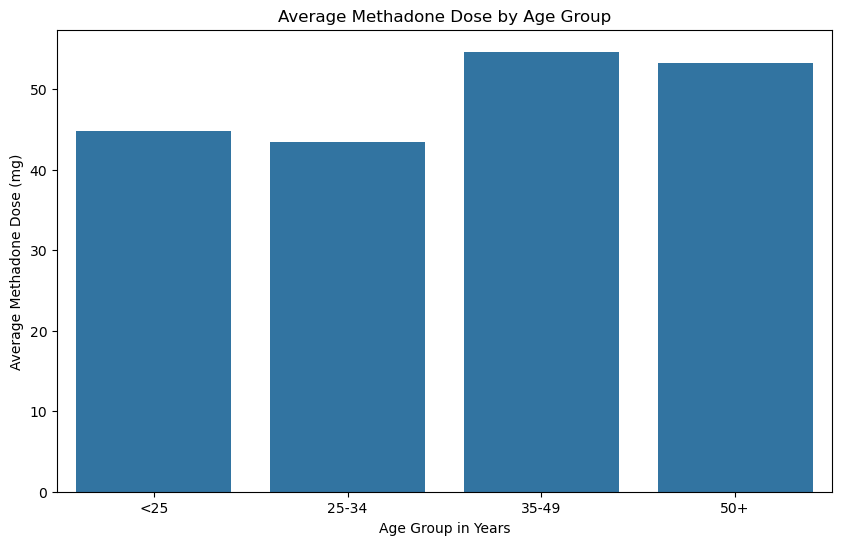

In [180]:
# Group by age group and calculate the average methadone dose using the mean 

#Generating age-group column using this function (<25, 25-34, 35-49, 50+)
def age_group(age):
    if age < 25:
        return '<25'
    elif 25 <= age <= 34:
        return '25-34'
    elif 35 <= age <= 49:
        return '35-49'
    else:
        return '50+'

#creating a new column called 'age_group'
df_methadone_treatment['age_group'] = df['age'].apply(age_group)
df_methadone_treatment

age_group = cleaned_df.groupby('age_group')['methadone_dose_mg'].mean().reset_index()
age_group_order = ['<25', '25-34', '35-49', '50+']

# Create a bar plot for average methadone dose by age group
plt.figure(figsize=(10, 6))
sns.barplot(x='age_group', y='methadone_dose_mg', data=age_group, order=age_group_order)
plt.title('Average Methadone Dose by Age Group')
plt.xlabel('Age Group in Years')
plt.ylabel('Average Methadone Dose (mg)')
plt.show()
#show how to generate age group column
#df.groupby('age group')['methadone_dose_mg'].mean().round(2).plot(kind = 'bar')
#plt.title('Average Methadone Dose by Age Group')
#plt.xlabel('Age Group in Years')
#plt.ylabel('Average Methadone Dose (mg)')
#plt.show()

In [152]:
# Plotting Average Methadone Dose for All patients over 30 days.

df_methadone_treatment['methadone_dose_mg'].mean().round(2).plot(kind = 'barh')

plt.plot(['date_of_service'], ['average_methadone_dose_mg'], label='average methadone dose (mg)')
plt.xlabel('Date of Service')
plt.ylabel('Methadone Dose (mg)')
plt.title('Average Methadone Dose for All Patients over 30 Days')
plt.legend()
plt.grid()
plt.show()
#df_methadone_treatment['methadose_dose_mg'].mean().round(2).plot(kind = 'barh') use this code and plts
# We dont need to generate a column for average_methadone_dose_mg

AttributeError: 'numpy.float64' object has no attribute 'plot'

In [ ]:
#line graph with all patients methadone doses over 30 days in november
#very disorganized, looks messy, limit to maybe 5 patients?

plt.plot(alldoses['date_of_service'], alldoses['methadone_dose_mg'], label='idk')
plt.xlabel('Date of Service')
plt.ylabel('Methadone Dose (mg)')
plt.xticks(rotation=-70)
plt.title('Methadone Dose Over Time')
plt.legend()
plt.grid()
plt.show()
#no all doses column wrong code

In [ ]:
#line graph showing methadone dose over time for first 3 patients
#set figure size first
plt.figure(figsize=(15, 10))


plt.plot('dates', 'patient1')
plt.plot('dates', 'patient2')
plt.plot('dates', 'patient3')

#customize
plt.title("Methadone Doses Over Time")
plt.xlabel('Date of Service')
plt.ylabel('Methadone Dose (mg)')
plt.xticks(rotation=80)
plt.legend(["Patient1", 'Patient2', 'Patient3'])
plt.show()

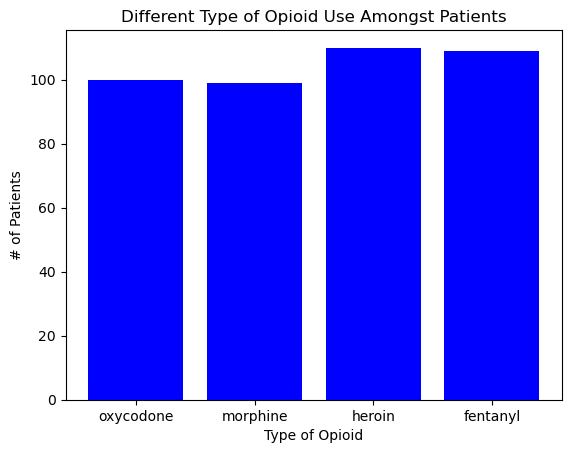

In [154]:
#bar graph comparing different type of previous opioid use 

plt.bar(x = df['previous_opioid_use'],
        height = df['patient_id'],
        color = 'blue')

#customize

plt.title("Different Type of Opioid Use Amongst Patients")
plt.xlabel('Type of Opioid')
plt.ylabel('# of Patients')
plt.show()
#stick with blue


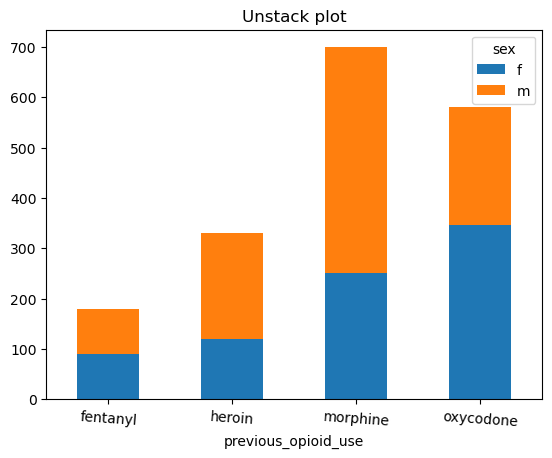

In [583]:
#unstack plot showing different type of opioid use depending on sex
df.groupby(['previous_opioid_use','sex']).size().unstack().plot(kind='bar',stacked=True)
plt.title('Unstack plot' )
plt.xticks(rotation=-4)
plt.show()

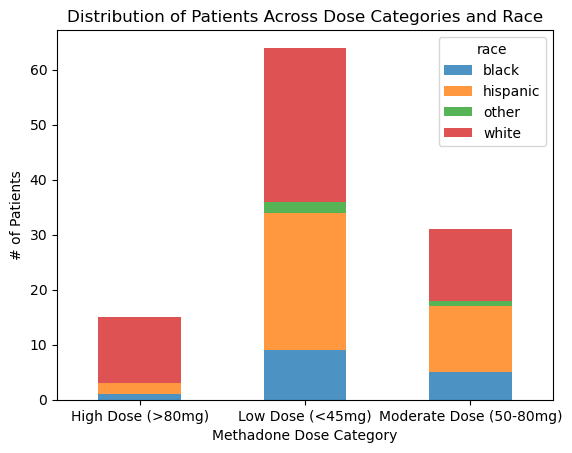

In [28]:
##unstack plot to show the distribution of patients across dose categories and race
dose_race_distribution = pd.crosstab(cleaned_df['dose_category'], cleaned_df['race'])

#plot and customize
dose_race_distribution.plot(kind='bar', stacked=True, alpha=0.8)
plt.title('Distribution of Patients Across Dose Categories and Race')
plt.xlabel('Methadone Dose Category')
plt.ylabel('# of Patients')
plt.xticks(rotation=0)
plt.show()

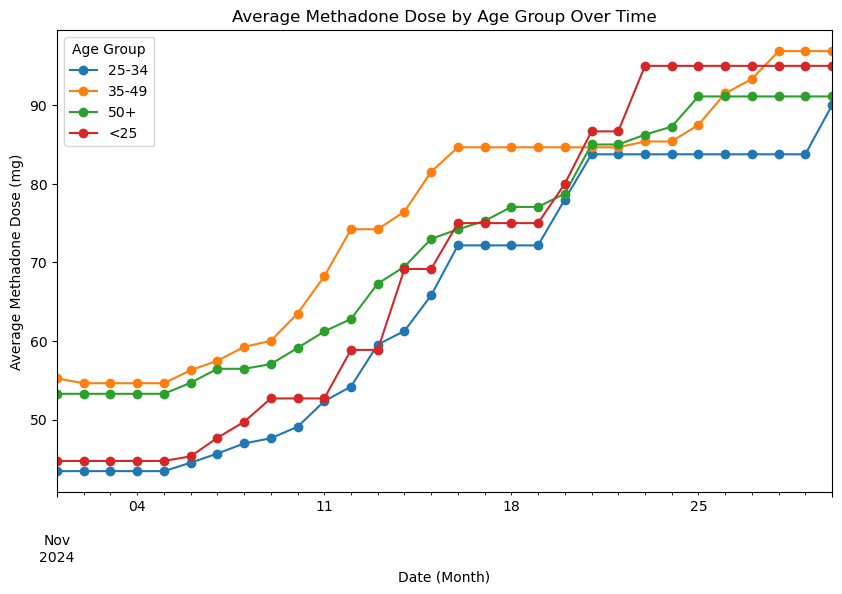

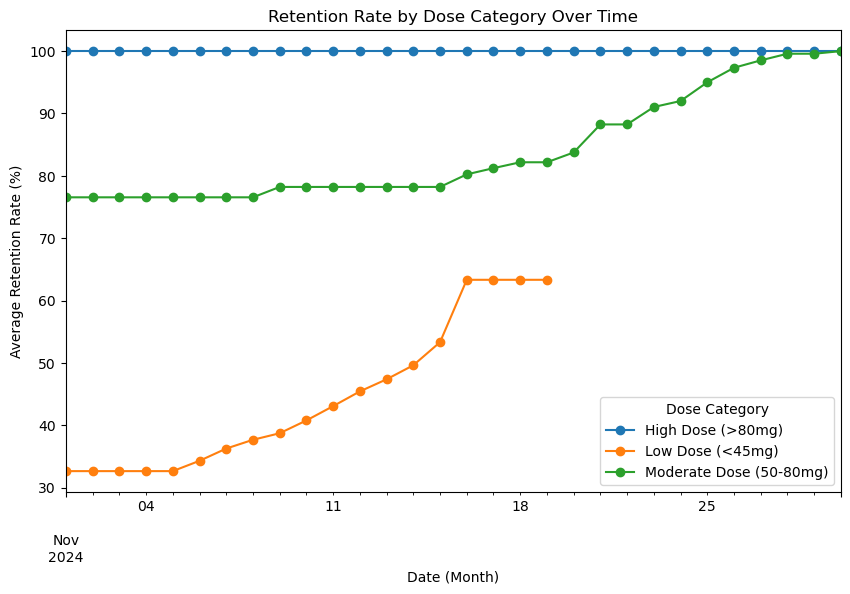

In [29]:
# Convert date_of_service to datetime for time-based analysis
df['date_of_service'] = pd.to_datetime(df['date_of_service'])

# 3. Methadone Dose vs Age Group (Average Over Time)
age_group_dose_over_time = df.groupby([df['date_of_service'], 'age_group'])['methadone_dose_mg'].mean().unstack()

# Plot the line chart for methadone dose over time by age group
age_group_dose_over_time.plot(kind='line', marker='o', figsize=(10, 6), title='Average Methadone Dose by Age Group Over Time')
plt.xlabel('Date (Month)')
plt.ylabel('Average Methadone Dose (mg)')
plt.legend(title='Age Group')
plt.show()

# 4. Retention Rate Across Dose Categories Over Time
dose_category_retention_over_time = df.groupby([df['date_of_service'], 'dose_category'])['retention rate'].mean().unstack()

# Plot the line chart for retention rate over time by dose category
dose_category_retention_over_time.plot(kind='line', marker='o', figsize=(10, 6), title='Retention Rate by Dose Category Over Time')
plt.xlabel('Date (Month)')
plt.ylabel('Average Retention Rate (%)')
plt.legend(title='Dose Category')
plt.show()

In [31]:
#Group by 'Race' and count the occurrences
race_counts = df['race'].value_counts() 
#move this

<Axes: xlabel='race'>

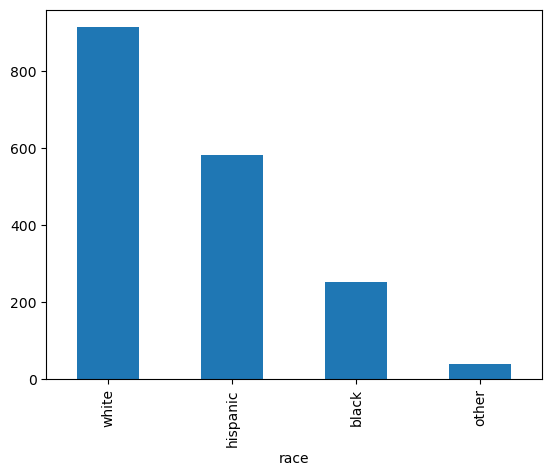

In [46]:
# Define custom colors using real color names
#colors = ['pink', 'blue', 'orange', 'purple', 'brown']


# use a barh instead
df['race'].value_counts().plot(kind = 'bar')
#plt.title
#plt.ylabel
#plt.show()

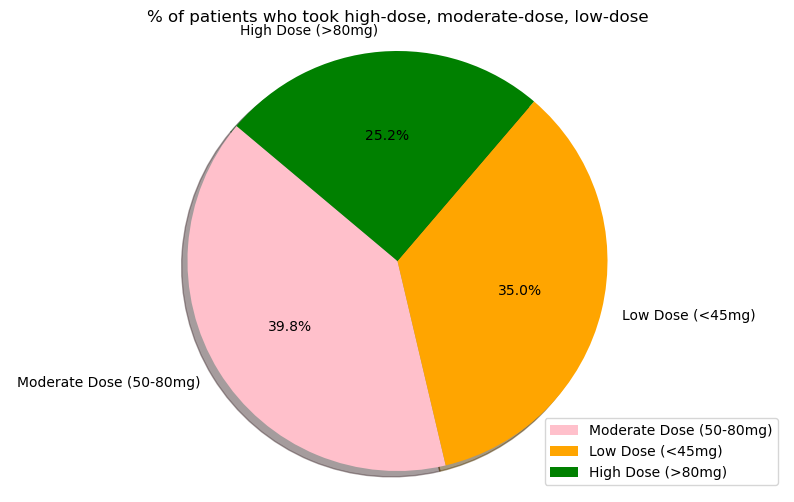

In [33]:
#Pie chart? - % of patients who took high-dose, moderate-dose, low-dose?
dose_counts = df['dose_category'].value_counts()

# Define custom colors
colors = ['pink', 'orange', 'green']

# Create a pie chart with custom colors
plt.figure(figsize=(10, 6))
plt.pie(dose_counts, labels=dose_counts.index, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('% of patients who took high-dose, moderate-dose, low-dose')
plt.legend(dose_counts.index, loc="lower right", bbox_to_anchor=(1.0, 0))
plt.show()
#use the barcode instead and generate the dose category code here

In [494]:
# Male/female vs Retention Rate (shows which sex has a higher retention rate?)

#grouped3 = df.groupby(["retention rate", 'sex']).count()
#grouped3

#grouped4 = df.groupby(["retention rate", 'methadone_dose_mg']).count()
#grouped4

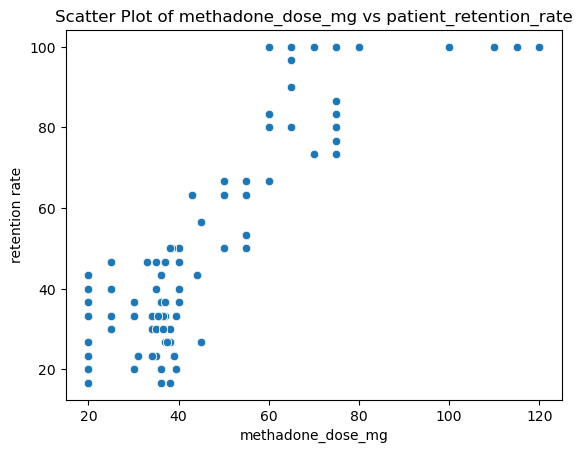

In [156]:
#Scatter Plot (e.g. correlation between methadone dose and patient retention rate)

sns.scatterplot(data=df_methadone_treatment, x = 'methadone_dose_mg', y = 'retention rate')

plt.title('Scatter Plot of methadone_dose_mg vs patient_retention_rate')
plt.show()
#positive correlation between methadone dose and patient retention rate.

In [168]:
#Line Chart (e.g. track a patient’s methadone dose over time) 
#This line chart tracks patient ID 1 and used week of year so that the chart would appear neat

# filter the dataset where patient Id == 1
df_first_patient = df_methadone_treatment[df.patient_id== 1]
plt.show()

In [ ]:
#generating week of year
df['week_of_month'] = pd.to_datetime(df['date_of_service']).dt.isocalendar().week

#showing line chart

df_first_patient.plot(x='week_of_month', y='methadone_dose_mg', kind='line')
plt.title('Patient 1 methadone dose overtime')
plt.ylabel('methadone_dose_mg')

plt.show()

In [49]:
df['week_of_month'] = df['date_of_service'].apply(lambda x: (x.day-1)// 7 + 1)

<Axes: xlabel='week_of_month'>

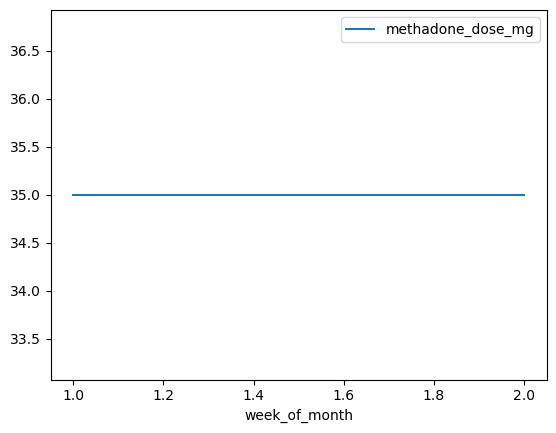

In [52]:
#choose pateint id 8 
df[df.patient_id == 8].plot(x = 'week_of_month', y = 'methadone_dose_mg', kind = 'line')

In [39]:
# Check the column names in your DataFrame
print(cleaned_df.columns)

Index(['patient_id', 'name', 'sex', 'age', 'race', 'previous_opioid_use',
       'duration_previous_opioid_use', 'methadone_dose_mg',
       'total_days_attended', 'dose_category', 'age_group', 'retention rate'],
      dtype='object')


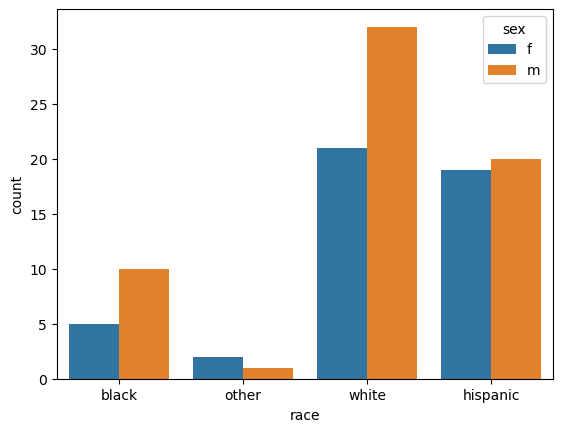

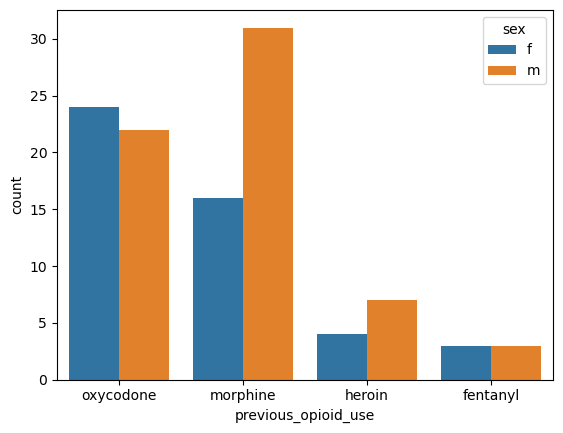

In [40]:
# 6) create and display count plots for the "race" and "previous_opioid_use" columns, with bars colored by the "sex" column.
totalCleandata= len(cleaned_df)
columns = ["race","previous_opioid_use"]
for i in columns:

    ax1 = sns.countplot(data=cleaned_df,x= i,hue="sex")
    plt.show()

Total number of rows in cleaned_df: 110


<Axes: >

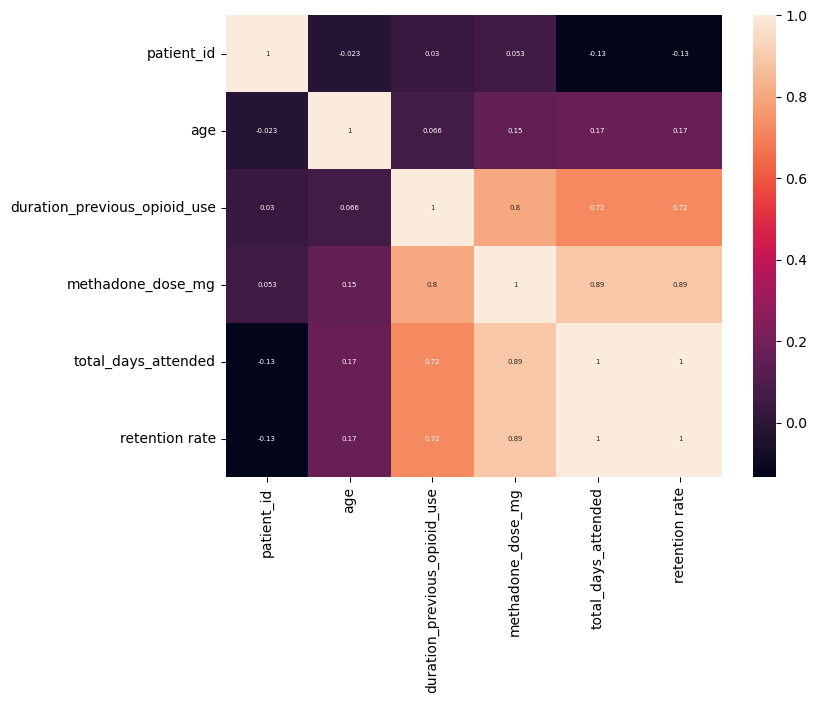

In [41]:
#The total number of rows in `cleaned_df` and then display the heatmap.
totalCleandata= len(cleaned_df)
print(f"Total number of rows in cleaned_df: {totalCleandata}")

# Convert non-numeric columns to numeric, forcing errors to NaN
cleaned_df = cleaned_df.apply(pd.to_numeric, errors='coerce')

# Drop columns with NaN values
cleaned_df = cleaned_df.dropna(axis=1, how='any')

plt.figure(figsize=(8, 6))
sns.heatmap(cleaned_df.corr(), annot=True, annot_kws={"size":5})

#In this context stick with scatter plot heat map is 


# In the heatmap, darker colors typically represent stronger correlations (either positive or negative), while lighter colors represent weaker correlations.
# In this graph shows that the PATIENT_ID and AGE have a strong positive correlation.(Right?)